# Life Expectancy & GDP Analysis

## Introduction

The following data was acquired from Codeacademy's Data Analysis course*.   
The data includes 5 countries alongside their GDP and population's life expectancy from 2000 to 2015. 

Our goal is to determine if there is a correlation between GDP and life expectancy for each country. 
Along the way we will also be answering the following questions:
- What is the average life expectancy per country?
- What is the distribution for life expectancy and country?
- Has life expectancy and GDP increased over time? 
- is there a correlation between GDP and life expectancy?


*They gathered this data from the World Health Organization and World Bank.

## Data Preparation

### Importing Necessary Libraries & Reading the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
data = pd.read_csv('all_data.csv')
data.head() 

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
data['Country'].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [4]:
data['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

### Cleanse/Format/Blend 

In [5]:
#checking the dytypes are correct so I can properly use the data for analysis (as well as any null values)
data.info()

#another way to check null values
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

## Exploratory Data Analysis

### Descriptive Analysis

In [6]:
country_mean = data.drop('Year', axis=1).groupby(data['Country']).mean().reset_index()
country_mean

,Country,Life expectancy at birth (years),GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


The table above groups the countries and averages their population's life expectancy at birth and their GDP.

### GDP Analysis

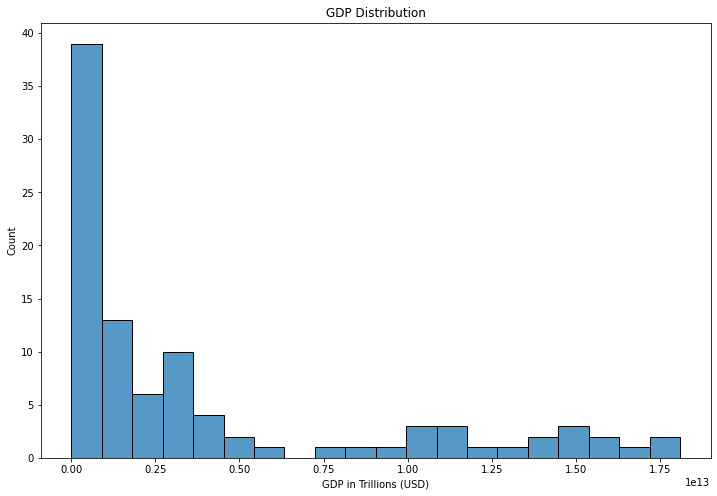

<Figure size 432x288 with 0 Axes>

In [7]:
#Distribution
plt.figure(figsize=(12,8))
sns.histplot(data['GDP'],bins=20)
plt.title('GDP Distribution')
plt.xlabel('GDP in Trillions (USD)')
plt.show()
plt.clf()

This distribution is right skewed, indicating for many years the countries in our dataset had a GDP in the billions (USD) with very few years in the trillions (USD).
It, however, does not tell us which countries fall within this distribution.  

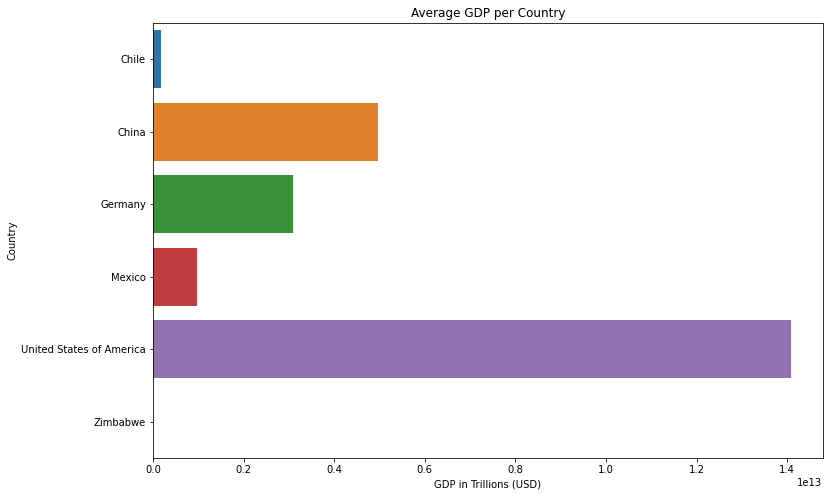

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize=(12,8))
sns.barplot(x = country_mean['GDP'], y = country_mean['Country'])
plt.title('Average GDP per Country')
plt.xlabel('GDP in Trillions (USD)')
plt.ylabel('Country')
plt.show()
plt.clf()

In the graph above, we can now compare the average GDP per country for the years 2000 - 2015. 

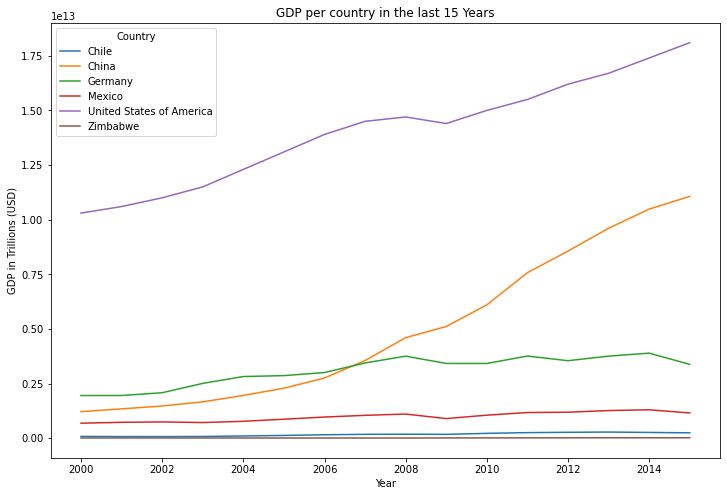

<Figure size 432x288 with 0 Axes>

In [9]:
#Growth through the years
plt.figure(figsize=(12,8))
sns.lineplot(data = data, x = 'Year', y = 'GDP', hue = 'Country')
plt.title('GDP per country in the last 15 Years')
plt.xlabel('Year')
plt.ylabel('GDP in Trillions (USD)')
plt.show()
plt.clf()

Visualizing the growth of GDP per country through 2000-2015. 

### Life Expectancy Analysis

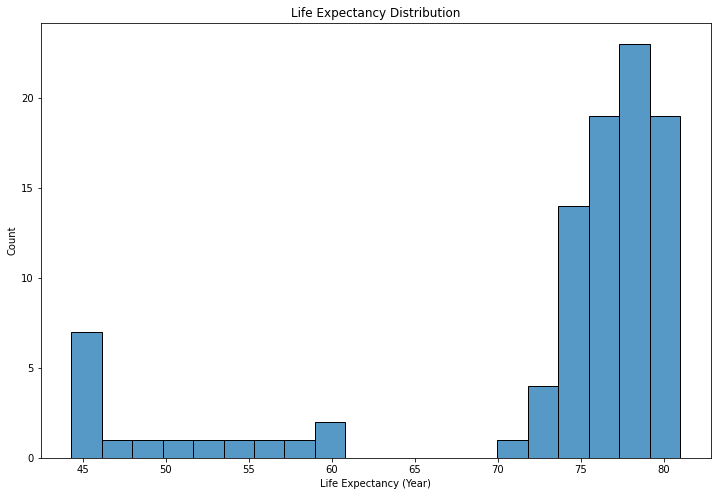

<Figure size 432x288 with 0 Axes>

In [10]:
#Distribution
plt.figure(figsize=(12,8))
sns.histplot(data['Life expectancy at birth (years)'], bins=20)
plt.title('Life Expectancy Distribution')
plt.xlabel('Life Expectancy (Year)')
plt.show()
plt.clf()

As with GDP, we can visualize the overall distribution of the life expectancy of our data set. We can see that our distribution is left skewed because Zimbabwe has a low lif expectancy compared to the other countries. Most countries average between 75-80 (this can be compared to the mean dataframe we did above).

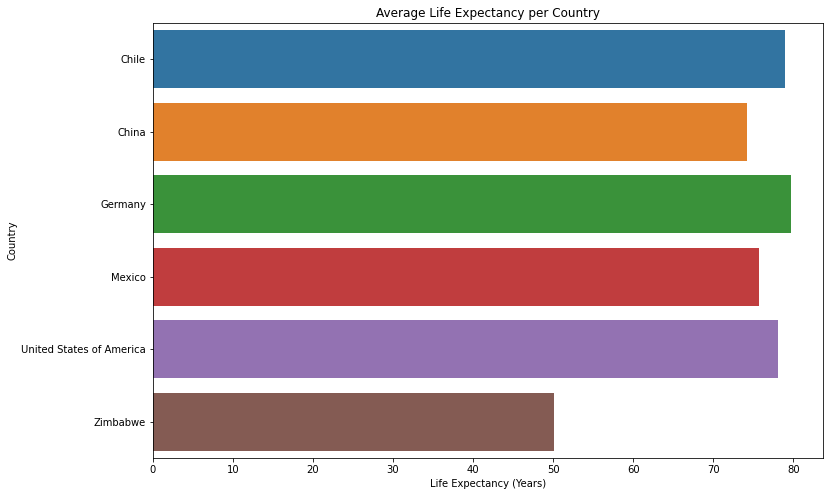

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(x = country_mean['Life expectancy at birth (years)'], y = country_mean['Country'])
plt.title('Average Life Expectancy per Country')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Country')
plt.show()
plt.clf()

The graph above shows us the country and their average life expectancy, after we have visualized the distribution. 

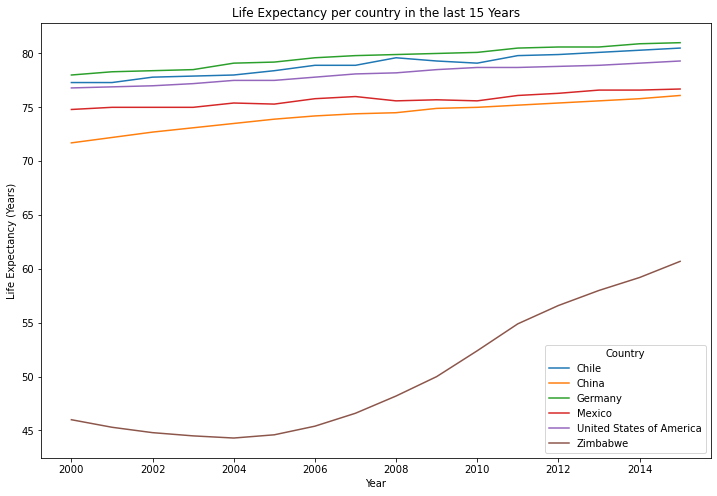

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(12,8))
sns.lineplot(data = data, x = 'Year', y = 'Life expectancy at birth (years)', hue = 'Country')
plt.title('Life Expectancy per country in the last 15 Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (Years)')
plt.show()
plt.clf()

In the graph above, we visualize the change in life expectancy from 2000 - 2015. 

### Correlation Between GDP and Life Expectancy

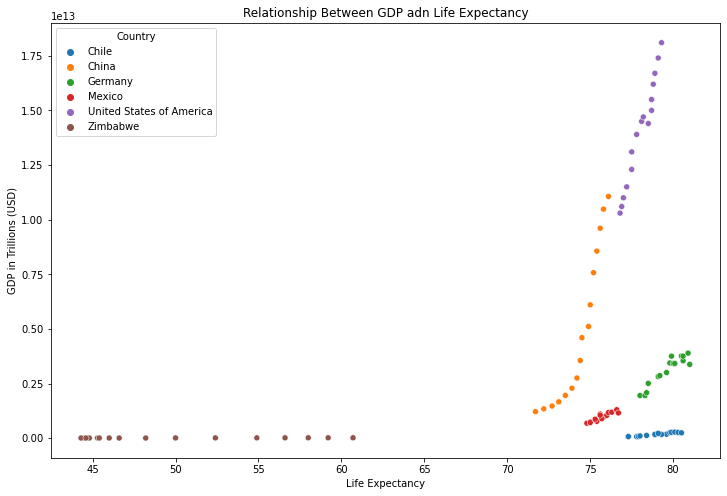

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x = 'Life expectancy at birth (years)', y = 'GDP', hue = 'Country')
plt.title('Relationship Between GDP adn Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP in Trillions (USD)')
plt.show()
plt.clf()

In [14]:
corr_gdp_le, p = pearsonr(data['GDP'], data['Life expectancy at birth (years)'])
corr_gdp_le

0.343206748449156

## Conclusion      

From the analysis above, we can conclude the following:  

- What is the average life expectancy per country?
For most countries the average life expectancy is in the mid to top 70s, with the exception of Zimbabwe who has an average life expectancy of 50 years.  

- What is the distribution for life expectancy and country?  
Although most country's average life expectancy is in the 70s, The distribution of this category is left skewed because Zimbabwe's expectancy is 20 years lower through the 15 years of data. 

As for the GDP, the distribution is right skewed because most of the countries are within the billion and low trillion range. United States' GDP is larger than everyone else - pulling the distribution further to the right. 

- Has life expectancy and GDP increased over time?  
Overall, both categories have increased throughout the 15 years of data. Out of all the 5 countries, it is worth noting that China's GDP grew the most while Zimbabwe's life expectancy grew the most.

- Is there a correlation between GDP and life expectancy?  
There is a linear relationship between GDP and life expectancy (pearson's correlation of 0.3), although this does not mean correlation implies causation.

